## About
This jupyter notebook covers using "word2vec" in python. To run this you neeed [gensim](http://radimrehurek.com/gensim/install.html) a word2vec implementation in python and 
[Cython](http://docs.cython.org/en/latest/src/quickstart/install.html) to speed up the traning process.

The ouputs of word2vec are reduced to lower dimensions using [TSNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) and plotted for better visualization.

In [1]:
%matplotlib inline 
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# download example data ( may take a while)
train = fetch_20newsgroups()

In [3]:
def clean(text):
    """Remove posting header, split by sentences and words, keep only letters"""
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

In [4]:
# input to word2vec model
sentences = [line for text in train.data for line in clean(text)]
model = Word2Vec(sentences, workers=4, size=100, min_count=50, window=10, sample=1e-3)

In [17]:
# save the trained model
model.save('20newsgroups_analysis')

In [ ]:
#load the saved model
#model = Word2Vec.load('20newsgroups_analysis')

In [5]:
# most similar words to 'memory'
print (model.most_similar('memory'))

[('cpu', 0.8466349840164185), ('colour', 0.7780674695968628), ('configuration', 0.7754700779914856), ('cache', 0.7640649080276489), ('monitor', 0.7624616622924805), ('ram', 0.7546811103820801), ('disk', 0.7480458617210388), ('timing', 0.7474486827850342), ('motherboard', 0.7430862784385681), ('fixed', 0.742327094078064)]


In [18]:
# simple visualization
'''
X = model[model.wv.vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()
'''

'\nX = model[model.wv.vocab]\ntsne = TSNE(n_components=2)\nX_tsne = tsne.fit_transform(X)\nplt.scatter(X_tsne[:, 0], X_tsne[:, 1])\nplt.show()\n'

In [7]:
# getting the words
vocab = list(model.wv.vocab)
X = model[vocab]

# transforming the words from orignal dimensions to '2' using TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [14]:
# forming a pandas frame from TSNE output
df = pd.concat([pd.DataFrame(X_tsne),
                pd.Series(vocab)],
               axis=1)

df.columns = ['x', 'y', 'word']
df.head()

,x,y,word
0,48.733624,-8.218798,teaching
1,-20.930243,28.322296,archive
2,61.768017,18.975590,cannot
3,32.007534,-12.570704,judged
4,-54.270920,-10.073072,article


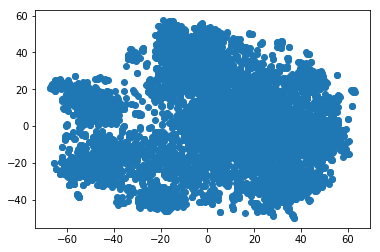

In [16]:
# plotting the TSNE results 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

'''
# adding annotation to points of graph
for i, txt in enumerate(df['word']):
    ax.annotate(txt, (df['x'].iloc[i], df['y'].iloc[i]))
'''
# plotting the graph
ax.scatter(df['x'], df['y'])